# Resolución numérica de problemas de valor inicial
Los métodos implementados son los siguientes:
- Ecuaciones diferenciales.
    - Método de Euler: `euler`.
    - Método de Heun: `heun`.
    - Método de punto medio: `punto_medio`.
    - Método RK4: `rk4`.
    - Método de Taylor de orden 2: `taylor2`.
    - Método de Taylor de orden 3: `taylor3`.
    - Método RK2(3): `rk23`.
    - Método RK4(5): `rk45`.
    - Método AB2: `ab2`.
- Sistemas de ecuaciones diferenciales.
    - Método de Euler para sistemas: `euler_sistema`.
    - Método de Heun para sistemas: `heun_sistema`.
    - Método de punto medio para sistemas: `punto_medio_sistema`.
    - Método RK4 para sistemas: `rk4_sistema`.

In [1]:
from numpy import *
from matplotlib.pyplot import *

## Problemas propuestos

### Problema 1
Hallar la solución del problema de valor inicial
$$(P_1) \begin{cases}
y' = \frac{1}{2}(t^2 - y), & t \in [0, 10], \\
y(0) = 1,
\end{cases}$$
cuya solución exacta es la función
$$y(t) = t^2-4t+8-7e^{-t/2}.$$

In [2]:
def f(t, y):
    return (1/2)*(t**2 - y)

def exacta_p1(t):
    return t**2 - 4*t + 8 - 7*exp(-t/2)

### Problema 2
Hallar la solución del problema de valor inicial
$$(P_2) \begin{cases}
y'' + 20y' + 101y = 0, & t \in [0, 2], \\
y(0) = 1, \; y'(0) = -10,
\end{cases}$$
cuya solución exacta es la función
$$y(t) = e^{-10t}\cos(t).$$

El problema se puede reescribir como un sistema de ecuaciones:
$$(P_2) \begin{cases}
x' = y, \\
y' = -101x - 20y, & t \in [0, 2], \\
x(0) = 1, \; y(0) = -10.
\end{cases}$$

In [3]:
def g(t, z):
    x, y = z[0], z[1]
    return array([y, -101*x - 20*y])

def exacta_p2(t):
    return exp(-10*t)*cos(t)

## Método de Euler
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Euler se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf(t_k, y_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [4]:
def euler(a, b, f, y0, N = 100):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*f(t[k], y[k])
    
    return t, y

Aplicamos el método de Euler al problema $(P_1)$ con $N = 10$.

Error: 1.9577171835064036


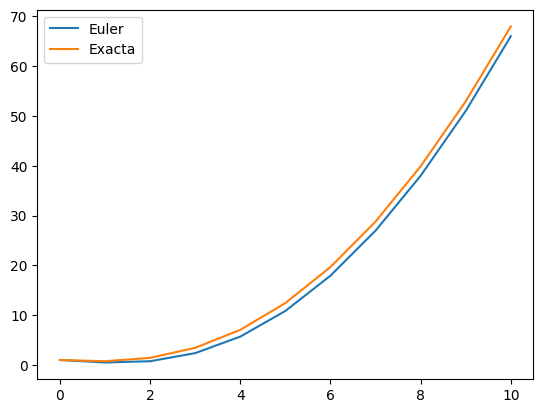

In [5]:
t, y = euler(0, 10, f, 1, 10)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Euler", "Exacta"])
show()

## Método de Heun
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Heun se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + \frac{h}{2}(f(t_k, y_k) + f(t_{k+1}, y_k + hf(t_k, y_k))), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [6]:
def heun(a, b, f, y0, N = 100):    
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h/2 * (f(t[k], y[k]) + f(t[k+1], y[k] + h*f(t[k], y[k])))
    
    return t, y

Aplicamos el método de Heun al problema $(P_1)$ con $N = 10$.

Error: 0.6441043685243386


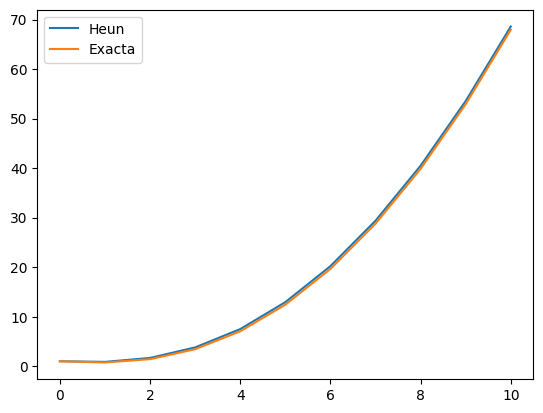

In [7]:
t, y = heun(0, 10, f, 1, 10)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Heun", "Exacta"])
show()

## Método del punto medio
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método del punto medio se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf\left(t_k + \frac{h}{2}, y_k + \frac{h}{2}f(t_k, y_k)\right), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [8]:
def punto_medio(a, b, f, y0, N = 100):    
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h * f(t[k] + h/2, y[k] + h/2 * f(t[k], y[k]))
    
    return t, y

Aplicamos el método del punto medio al problema $(P_1)$ con $N = 10$.

Error: 0.31380268419691504


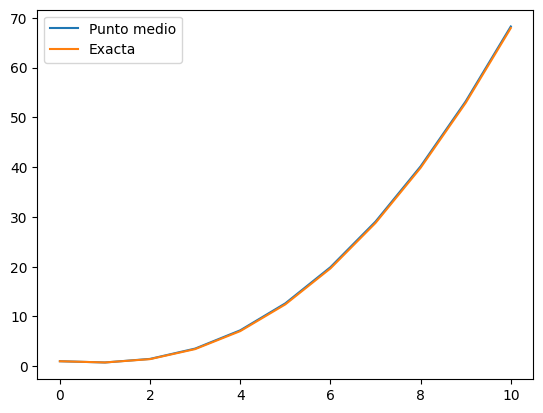

In [9]:
t, y = punto_medio(0, 10, f, 1, 10)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Punto medio", "Exacta"])
show()

## Método RK4
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Runge-Kutta de cuarto orden se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + \frac{h}{6}\,(K_1 + 2\,K_2 + 2\,K_3 + K_4), & k = 0, 1, 2, \dots N-1,
\end{cases}$$
donde
\begin{align*}
K_1 & = f(t_k, y_k), \\
K_2 & = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2}K_1\right), \\
K_3 & = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2}K_2\right), \\
K_4 & = f(t_{k+1}, y_k + hK_3).
\end{align*}

In [10]:
def rk4(a, b, f, y0, N = 100):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a 
    y[0] = y0 

    for k in range(N):
        t[k+1] = t[k] + h
        k1 = f(t[k], y[k])
        k2 = f(t[k] + h/2, y[k] + h/2 * k1)
        k3 = f(t[k] + h/2, y[k] + h/2 * k2)
        k4 = f(t[k+1], y[k] + h*k3)
        y[k+1] = y[k] + h/6 *(k1 + 2*k2 + 2*k3 + k4)
    
    return t, y

Aplicamos el método RK4 al problema $(P_1)$ con $N = 10$.

Error: 0.006390618074917143


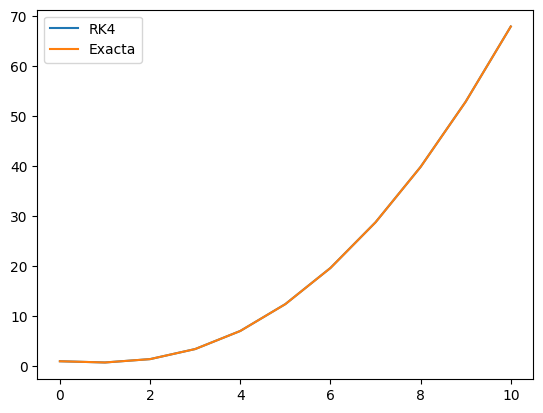

In [11]:
t, y = rk4(0, 10, f, 1, 10)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["RK4", "Exacta"])
show()

## Método de Taylor de orden 2
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Taylor de orden 2 se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf(t_k, y_k) + \frac{h^2}{2}\frac{df}{dt}(t_k, y_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [12]:
def taylor2(a, b, f, df, y0, N = 100):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0
    
    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*f(t[k], y[k]) + h**2/2*df(t[k], y[k])
        
    return t, y

Aplicamos el método de Taylor de orden 2 al problema $(P_1)$ con $N = 10$.
La derivada de $ft, y = \frac{1}{2}(t^2 - y)$ con respecto a $t$ es
$$\frac{df}{dt} = t - \frac{1}{2}y'(t) = t - \frac{1}{2}f(t, y).$$

Error: 0.15921891179990366


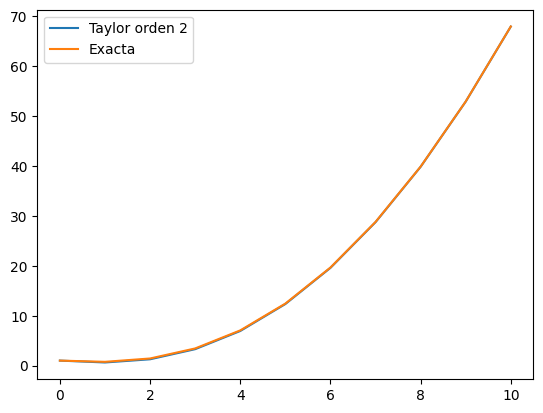

In [13]:
def df(t, y):
    return t - 1/2 * f(t, y)

t, y = taylor2(0, 10, f, df, 1, 10)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Taylor orden 2", "Exacta"])
show()

## Método de Taylor de orden 3
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Taylor de orden 3 se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf(t_k, y_k) + \frac{h^2}{2}\frac{df}{dt}(t_k, y_k) + \frac{h^3}{6}\frac{d^2f}{dt^2}(t_k, y_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [14]:
def taylor3(a, b, f, d1f, d2f, y0, N = 100):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0
    
    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*f(t[k], y[k]) + h**2/2*d1f(t[k], y[k]) + h**3/6*d2f(t[k], y[k])
        
    return t, y

Aplicamos el método de Taylor de orden 3 al problema $(P_1)$ con $N = 10$.
Las derivadas primera y segunda de $ft, y = \frac{1}{2}(t^2 - y)$ con respecto a $t$ son
\begin{align*}
    \frac{df}{dt}(t, y) & = t - \frac{1}{2}y'(t) = t - \frac{1}{2}f(t, y), \\
    \frac{d^2f}{dt^2}(t, y) &= 1 - \frac{1}{2}\frac{df}{dt}(t, y).
\end{align*}

Error: 0.020034560422318437


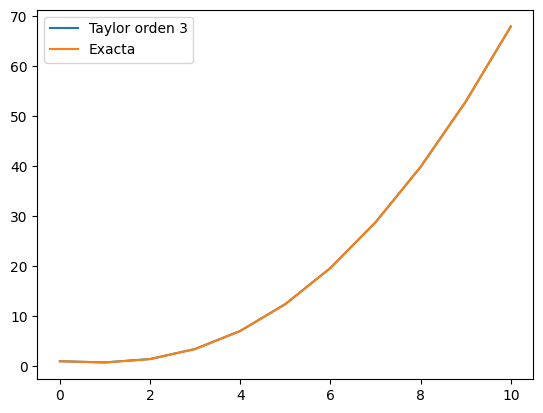

In [15]:
def df1(t, y):
    return t - 1/2 * f(t, y)

def df2(t, y):
    return 1 - 1/2 * df1(t, y)

t, y = taylor3(0, 10, f, df1, df2, 1, 10)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Taylor orden 3", "Exacta"])
show()

## Método RK2(3)
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$

Sea $h_0$ el paso de malla inicial y sea $\varepsilon$ la tolerancia establecida.

Consideramos las funciones incremento
\begin{align*}
    \Phi(t_k, y_k; h_k) & = \sum_{i=1}^3 b_if(t_k^{(i)}, y_k^{(i)}), \\
    \Phi^\ast(t_k, y_k; h_k) & = \sum_{i=1}^3 b^\ast_if(t_k^{(i)}, y_k^{(i)}),
\end{align*}
donde
\begin{align*}
    t_k^{(i)} & = t_k + c_ih_k, \\
    y_k^{(i)} & = y_k + h_k\sum_{j=1}^3 a_{ij}f(t_k^{(j)}, y_k^{(j)}),
\end{align*}
con las matrices de coeficientes
$$A = \begin{pmatrix}
    0 & 0 & 0 \\
    1/2 & 0 & 0 \\
    -1 & 2 & 0
\end{pmatrix}, \quad
b = \begin{pmatrix}
0 \\
1 \\
0
\end{pmatrix}, \quad
b^\ast = \begin{pmatrix}
1/6 \\
2/3 \\
1/6
\end{pmatrix}, \quad
c = \begin{pmatrix}
0 \\
1/2 \\
1
\end{pmatrix}.$$

El método RK2(3) se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + h_k\Phi(t_k, y_k; h_k),
\end{cases}$$
donde la estimación del error viene dada por
$$\tilde{\varepsilon}_k = h_k(\Phi^\ast(t_k, y_k; h_k) - \Phi(t_k, y_k; h_k))$$
y el paso de malla se determina de la forma
$$h_{k+1} = h_k\left(\frac{\varepsilon}{|\tilde{\varepsilon}_k|}\right)^{1/3}.$$

In [16]:
def rk23(a, b, f, y0, h0, tolerancia = 1e-7):    
    A = array([
        [0, 0, 0],
        [1/2, 0, 0],
        [-1, 2, 0]
    ])
    B1 = array([0, 1, 0])
    B2 = array([1/6, 2/3, 1/6])
    C = array([0, 1/2, 1])
    
    t = array([a])
    y = array([y0])
    h = array([h0])
    k = 0
    
    while (t[k] < b):
        if h[k] > b - t[k]:
            h[k] = b - t[k]
        K = zeros(3)
        for i in range(3):
            K[i] = f(t[k] + C[i]*h[k], y[k] + h[k]*sum(A[i, :]*K))
        incremento_1 = sum(B1*K)
        incremento_2 = sum(B2*K)
        t = append(t, t[k] + h[k])
        y = append(y, y[k] + h[k]*incremento_1)
        error = h[k] * (incremento_2 - incremento_1)
        h_nuevo = h[k] * (tolerancia/abs(error))**(1/3)
        h = append(h, h_nuevo)
        k += 1

    return t, y, h

Aplicamos el método RK2(3) al problema $(P_1)$ con $h_0 = 0.1$.

Error: 2.0962606740226875e-05


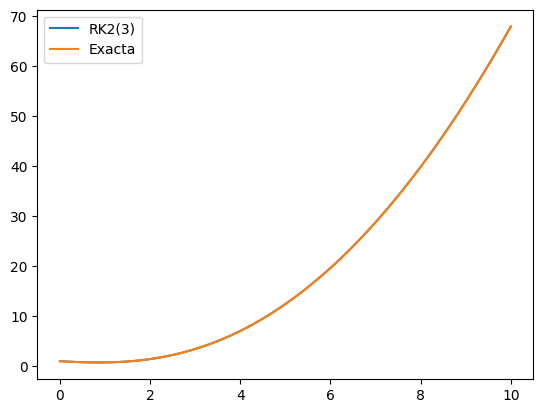

In [17]:
t, y, h = rk23(0, 10, f, 1, 0.1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["RK2(3)", "Exacta"])
show()

## Método RK4(5)
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$

Sea $h_0$ el paso de malla inicial y sea $\varepsilon$ la tolerancia establecida.

Consideramos las funciones incremento
\begin{align*}
    \Phi(t_k, y_k; h_k) & = \sum_{i=1}^6 b_if(t_k^{(i)}, y_k^{(i)}), \\
    \Phi^\ast(t_k, y_k; h_k) & = \sum_{i=1}^6 b^\ast_if(t_k^{(i)}, y_k^{(i)}),
\end{align*}
donde
\begin{align*}
    t_k^{(i)} & = t_k + c_ih_k, \\
    y_k^{(i)} & = y_k + h_k\sum_{j=1}^6 a_{ij}f(t_k^{(j)}, y_k^{(j)}),
\end{align*}
con las matrices de coeficientes
$$A = \begin{pmatrix}
    0 & 0 & 0 & 0 & 0 & 0 \\
    1/4 & 0 & 0 & 0 & 0 & 0 \\
    3/32 & 9/32 & 0 & 0 & 0 & 0 \\
    1932/2197 & -7200/2197 & 7296/2197 & 0 & 0 & 0 \\
    439/216 & -8 & 3680/513 & -845/4104 & 0 & 0 \\
    -8/27 & 2 & -3544/2565 & 1859/4104 & -11/40 & 0
\end{pmatrix},$$
$$b = \begin{pmatrix}
25/216 \\
0 \\
1408/2565 \\
2197/4104 \\
-1/5 \\
0
\end{pmatrix}, \quad
b^\ast = \begin{pmatrix}
16/135 \\
0 \\
6656/12825 \\
28561/56430 \\
-9/50 \\
2/55
\end{pmatrix}, \quad
c = \begin{pmatrix}
0 \\
1/4 \\
3/8 \\
12/13 \\
1 \\
1/2
\end{pmatrix}.$$

El método RK4(5) se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + h_k\Phi(t_k, y_k; h_k),
\end{cases}$$
donde la estimación del error viene dada por
$$\tilde{\varepsilon}_k = h_k(\Phi^\ast(t_k, y_k; h_k) - \Phi(t_k, y_k; h_k))$$
y el paso de malla se determina de la forma
$$h_{k+1} = h_k\left(\frac{\varepsilon}{|\tilde{\varepsilon}_k|}\right)^{1/5}.$$

In [18]:
def rk45(a, b, fun, y0, h0, tolerancia = 1e-7):      
    A = array([
        [0, 0, 0, 0, 0, 0],
        [1/4, 0, 0, 0, 0, 0],
        [3/32, 9/32, 0, 0, 0, 0],
        [1932/2197, -7200/2197, 7296/2197, 0, 0, 0],
        [439/216, -8, 3680/513, -845/4104, 0, 0],
        [-8/27, 2, -3544/2565, 1859/4104, -11/40, 0]
    ])
    B1 = array([25/216, 0, 1408/2565, 2197/4104, -1/5, 0])
    B2 = array([16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55])
    C = array([0, 1/4, 3/8, 12/13, 1, 1/2])
    
    t = array([a])
    y = array([y0])
    h = array([h0])
    k = 0
    
    while (t[k] < b):
        if h[k] > b - t[k]:
            h[k] = b - t[k]
        K = zeros(6)
        for i in range(6):
            K[i] = fun(t[k] + C[i]*h[k], y[k] + h[k]*sum(A[i, :]*K))
        incremento_1 = sum(B1*K)
        incremento_2 = sum(B2*K)
        t = append(t, t[k] + h[k])
        y = append(y, y[k] + h[k]*incremento_1)
        error = h[k] * (incremento_2 - incremento_1)
        h_nuevo = 0.9 * h[k] * (tolerancia/abs(error))**(1/5)
        h = append(h, h_nuevo)
        k += 1

    return t, y, h

Aplicamos el método RK4(5) al problema $(P_1)$ con $h_0 = 0.1$.

Error: 7.137452939787181e-07


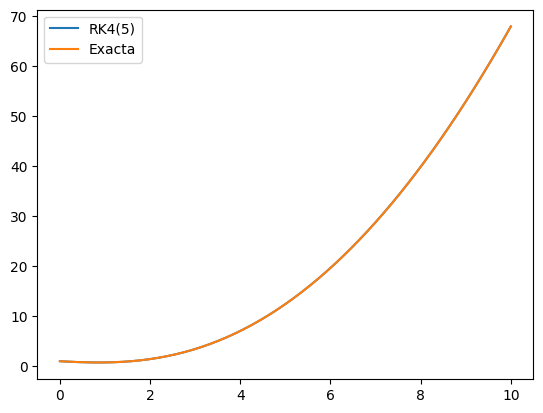

In [19]:
t, y, h = rk45(0, 10, f, 1, 0.1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["RK4(5)", "Exacta"])
show()

## Método AB2
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Adams-Bashforth de profundidad 2 se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + \frac{h}{2}(3f_k - f_{k-1}), & k = 0, 1, 2, \dots N-1, \\
\end{cases}$$
donde $f_k = f(t_k, y_k)$.

In [20]:
def ab2(a, b, fun, y0, N = 100):
    h = (b-a)/N 
    t = zeros(N+1)
    y = zeros(N+1)
    f = zeros(N+1)

    t[0] = a
    y[0] = y0
    f[0] = fun(a, y[0])

    t[1] = a + h
    y[1] = y[0] + h*f[0]
    f[1] = fun(t[1], y[1])

    for k in range(1, N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h/2 * (3*f[k] - f[k-1])
        f[k+1] = fun(t[k+1], y[k+1])
        
    return t, y

Aplicamos el método AB2 al problema $(P_1)$ con $N = 10$.

Error: 0.29984391179990366


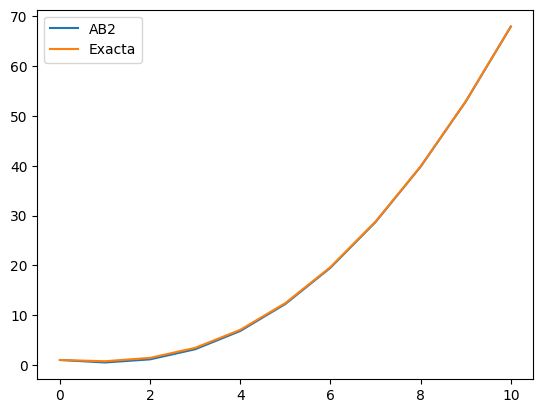

In [21]:
t, y = ab2(0, 10, f, 1, 10)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["AB2", "Exacta"])
show()

## Método de Euler para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Euler se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + hf(t_k, z_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [22]:
def euler_sistema(a, b, f, z0, N = 100):
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k] + h
        z[:, k+1] = z[:, k] + h*f(t[k], z[:, k])
    
    return t, z

Aplicamos el método de Euler para sistemas al problema $(P_2)$ con $N = 20$.

Error: 0.3660415762857376


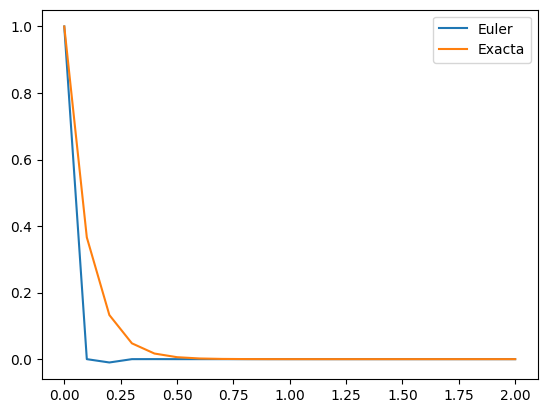

In [23]:
t, z = euler_sistema(0, 2, g, array([1, -10]), 20)
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Euler", "Exacta"])
show()

## Método de Heun para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Heun se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + \frac{h}{2}(f(t_k, z_k) + f(t_{k+1}, z_k + hf(t_k, z_k))), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [24]:
def heun_sistema(a, b, f, z0, N = 100):    
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k] + h
        z[:, k+1] = z[:, k] + h/2 * (f(t[k], z[:, k]) + f(t[k+1], z[:, k] + h*f(t[k], z[:, k])) )
    
    return t, z

Aplicamos el método de Heun para sistemas al problema $(P_2)$ con $N = 20$.

Error: 0.12895842371426242


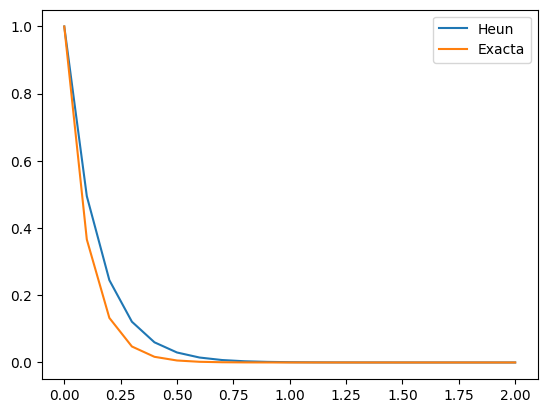

In [25]:
t, z = heun_sistema(0, 2, g, array([1, -10]), 20)
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Heun", "Exacta"])
show()

## Método del punto medio para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método del punto medio se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + hf\left(t_k + \frac{h}{2}, z_k + \frac{h}{2}f(t_k, z_k)\right), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [26]:
def punto_medio_sistema(a, b, f, z0, N = 100):    
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k] + h
        z[:, k+1] = z[:, k] + h*f(t[k] + h/2, z[:, k] + h/2*f(t[k], z[:, k]))
    
    return t, z

Aplicamos el método del punto medio para sistemas al problema $(P_2)$ con $N = 20$.

Error: 0.12895842371426242


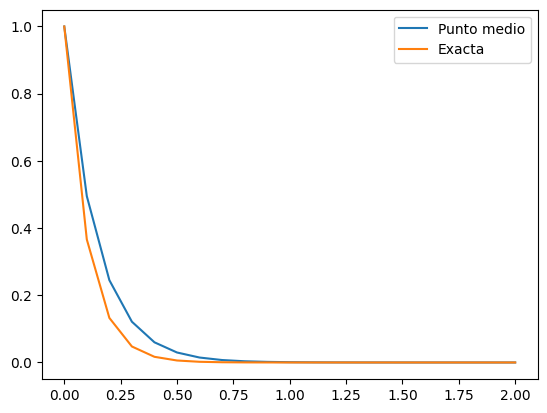

In [27]:
t, z = punto_medio_sistema(0, 2, g, array([1, -10]), 20)
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Punto medio", "Exacta"])
show()

## Método RK4 para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Runge-Kutta de cuarto orden se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + \frac{h}{6}\,(K_1 + 2\,K_2 + 2\,K_3 + K_4), & k = 0, 1, 2, \dots N-1,
\end{cases}$$
donde
\begin{align*}
K_1 & = f(t_k, z_k), \\
K_2 & = f\left(t_k + \frac{h}{2}, z_k + \frac{h}{2}K_1\right), \\
K_3 & = f\left(t_k + \frac{h}{2}, z_k + \frac{h}{2}K_2\right), \\
K_4 & = f(t_{k+1}, z_k + hK_3).
\end{align*}

In [28]:
def rk4_sistema(a, b, f, z0, N = 100):
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a 
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k]+h
        k1 = f(t[k], z[:, k])
        k2 = f(t[k] + h/2, z[:, k] + h/2 *k1)
        k3 = f(t[k] + h/2*h, z[:, k] + h/2 *k2)
        k4 = f(t[k+1], z[:, k] + h*k3)
        z[:, k+1] = z[:, k] + h/6 *(k1 + 2*k2 + 2*k3 + k4)
    
    return t, z

Aplicamos el método RK4 para sistemas al problema $(P_2)$ con $N = 20$.

Error: 0.006462590380929167


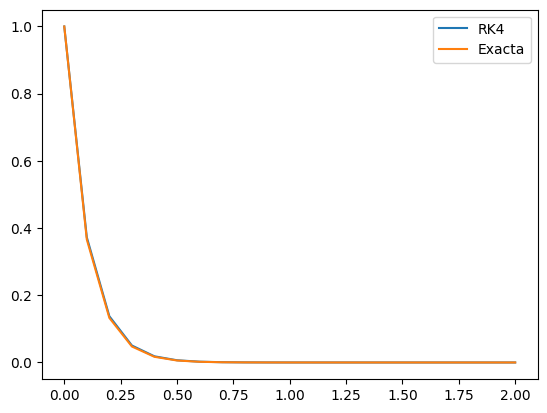

In [29]:
t, z = rk4_sistema(0, 2, g, array([1, -10]), 20)
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["RK4", "Exacta"])
show()